In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip uninstall -y tensorflow

Uninstalling tensorflow-2.4.1:
  Successfully uninstalled tensorflow-2.4.1


In [ ]:
!pip install tensorflow-gpu==2.0.0-beta0

     |████████████████████████████████| 349.7MB 23kB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 3.1MB 48.7MB/s 
     |████████████████████████████████| 501kB 54.9MB/s 


# Importing libraries and Data

In [ ]:
import numpy as np
import datetime
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn_pandas import CategoricalImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [ ]:
tf.__version__

'2.0.0-beta0'

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_Df64byy.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/test_YCcRUnU.csv')

# Knowing the Data

In [ ]:
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [ ]:
train_data.shape

(50882, 14)

# Checking for NaN values and repacing with mode

In [ ]:
train_data.columns[train_data.isnull().any()]

Index(['Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type'], dtype='object')

In [ ]:
imputer = CategoricalImputer()

In [ ]:
health_indicator = imputer.fit_transform(train_data["Health Indicator"])
hpd = imputer.fit_transform(train_data["Holding_Policy_Duration"])
hpt = imputer.fit_transform(train_data["Holding_Policy_Type"])

In [ ]:
train_data.drop(labels=["Health Indicator","Holding_Policy_Duration","Holding_Policy_Type"],axis=1)
train_data['Health Indicator'] = health_indicator
train_data['Holding_Policy_Duration'] = hpd
train_data['Holding_Policy_Type'] = hpt

In [ ]:
train_data.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,1.0,3.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X1,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


# Visualizing the Data

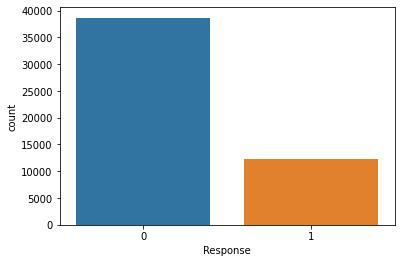

In [ ]:
sns.countplot(x = 'Response', data = train_data)

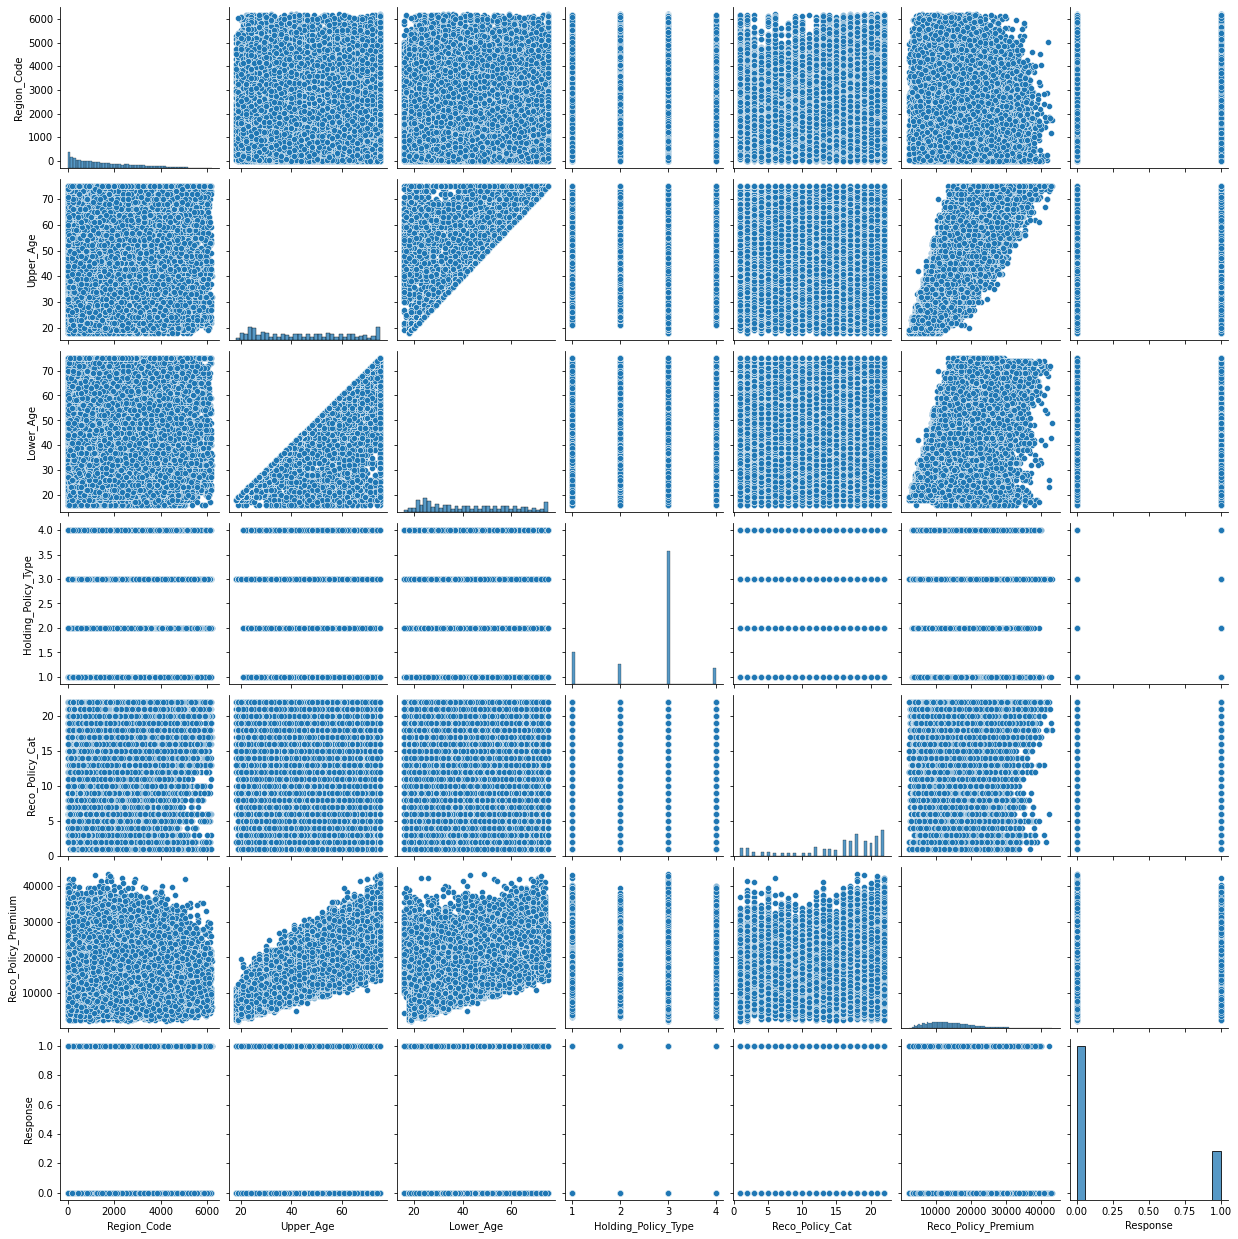

In [ ]:
train_data = train_data.drop(labels = ['ID'], axis = 1)
sns.pairplot(train_data)

# Pre-process the data

In [ ]:
multi_cat_data = train_data[["City_Code", "Health Indicator","Holding_Policy_Duration","Holding_Policy_Type","Reco_Policy_Cat"]]
binary_cat_data = train_data[["Accomodation_Type","Reco_Insurance_Type","Is_Spouse"]]
num_data = train_data[["Upper_Age","Lower_Age","Reco_Policy_Premium"]]
region_code = train_data["Region_Code"]

In [ ]:
region_code_array = region_code.values
region_code = region_code_array.reshape(-1,1)

In [ ]:
scaler = MinMaxScaler()
num_data_scaled = scaler.fit_transform(num_data)

In [ ]:
lb = preprocessing.LabelBinarizer()
acc = lb.fit_transform(binary_cat_data["Accomodation_Type"])
rit = lb.fit_transform(binary_cat_data["Reco_Insurance_Type"])
is_s = lb.fit_transform(binary_cat_data["Is_Spouse"])

In [ ]:
result_binary_cat_data = np.concatenate((acc,rit,is_s),axis=1)

In [ ]:
oe_style = OneHotEncoder()
oe_results = oe_style.fit_transform(multi_cat_data)
oe_results_region_code = oe_style.fit_transform(region_code)

In [ ]:
multi_cat_data_array = oe_results.toarray()
oe_results_region_code_array = oe_results_region_code.toarray()

In [ ]:
X = np.concatenate((result_binary_cat_data, multi_cat_data_array, num_data_scaled, oe_results_region_code_array),axis=1)

In [ ]:
X.shape

(50882, 5408)

In [ ]:
y = train_data["Response"]
y = y.values.reshape(-1,1)

In [ ]:
y.shape

(50882, 1)

# Preprocessing the test Data

In [ ]:
test_health_indicator = imputer.fit_transform(test_data["Health Indicator"])
test_hpd = imputer.fit_transform(test_data["Holding_Policy_Duration"])
test_hpt = imputer.fit_transform(test_data["Holding_Policy_Type"])

In [ ]:
test_data.drop(labels=["Health Indicator","Holding_Policy_Duration","Holding_Policy_Type"],axis=1)
test_data['Health Indicator'] = test_health_indicator
test_data['Holding_Policy_Duration'] = test_hpd
test_data['Holding_Policy_Type'] = test_hpt

In [ ]:
test_multi_cat_data = test_data[["City_Code", "Health Indicator","Holding_Policy_Duration","Holding_Policy_Type","Reco_Policy_Cat"]]
test_binary_cat_data = test_data[["Accomodation_Type","Reco_Insurance_Type","Is_Spouse"]]
test_num_data = test_data[["Upper_Age","Lower_Age","Reco_Policy_Premium"]]
test_region_code = test_data["Region_Code"]

In [ ]:
test_region_code_array = test_region_code.values
test_region_code = test_region_code_array.reshape(-1,1)

In [ ]:
test_num_data_scaled = scaler.fit_transform(test_num_data)

In [ ]:
test_acc = lb.fit_transform(test_binary_cat_data["Accomodation_Type"])
test_rit = lb.fit_transform(test_binary_cat_data["Reco_Insurance_Type"])
test_is_s = lb.fit_transform(test_binary_cat_data["Is_Spouse"])

In [ ]:
test_result_binary_cat_data = np.concatenate((test_acc,test_rit,test_is_s),axis=1)

In [ ]:
test_oe_results = oe_style.fit_transform(test_multi_cat_data)
test_oe_results_region_code = oe_style.fit_transform(test_region_code)

In [ ]:
test_multi_cat_data_array = test_oe_results.toarray()
test_oe_results_region_code_array = test_oe_results_region_code.toarray()

In [ ]:
test_inter = np.concatenate((test_result_binary_cat_data, test_multi_cat_data_array, test_num_data_scaled, test_oe_results_region_code_array),axis=1)

In [ ]:
'''
Applying one hot encoding to Region_Code column in trining data causes higher dimension. But, the dimension is low
in test data. This is due to presence of more categories in training data as compared to the test data. Hence, in order
to make predictions, dimension of test data needs to be equal to that of the training data. Hence, appending zero
matrix in the test data to equalize the dimension to that of the training data.
'''
row = test_inter.shape[0]
column = X.shape[1] - test_inter.shape[1]
zero_matrix = np.zeros((row, column))
test = np.concatenate((test_inter, zero_matrix),axis=1)

In [ ]:
test.shape

(21805, 5408)

# Train the model

In [ ]:
ANN_classifier = tf.keras.models.Sequential()

ANN_classifier.add(tf.keras.layers.Dense(units=1000, activation='relu', input_shape=(5408, )))

ANN_classifier.add(tf.keras.layers.Dense(units=500, activation='relu', kernel_regularizer='l2'))

ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu', kernel_regularizer='l2'))

ANN_classifier.add(tf.keras.layers.Dense(units=300, activation='relu', kernel_regularizer='l2'))

ANN_classifier.add(tf.keras.layers.Dense(units=100, activation='relu', kernel_regularizer='l2'))

ANN_classifier.add(tf.keras.layers.Dense(units=50, activation='relu', kernel_regularizer='l2'))

ANN_classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ANN_classifier.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 1000)              5409000   
_________________________________________________________________
dense_35 (Dense)             (None, 500)               500500    
_________________________________________________________________
dense_36 (Dense)             (None, 400)               200400    
_________________________________________________________________
dense_37 (Dense)             (None, 300)               120300    
_________________________________________________________________
dense_38 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_39 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                

In [ ]:
ANN_classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = ANN_classifier.fit(X, y, epochs = 20, batch_size = 64)

Train on 50882 samples
Epoch 1/20
50882/50882 [==============================] - 4s 79us/sample - loss: 1.0775 - accuracy: 0.7593
Epoch 2/20
50882/50882 [==============================] - 4s 73us/sample - loss: 0.5515 - accuracy: 0.7601
Epoch 3/20
50882/50882 [==============================] - 4s 71us/sample - loss: 0.5513 - accuracy: 0.7601
Epoch 4/20
50882/50882 [==============================] - 4s 71us/sample - loss: 0.5512 - accuracy: 0.7601
Epoch 5/20
50882/50882 [==============================] - 4s 70us/sample - loss: 0.5512 - accuracy: 0.7601
Epoch 6/20
50882/50882 [==============================] - 4s 71us/sample - loss: 0.5513 - accuracy: 0.7601
Epoch 7/20
50882/50882 [==============================] - 4s 72us/sample - loss: 0.5512 - accuracy: 0.7601
Epoch 8/20
50882/50882 [==============================] - 4s 74us/sample - loss: 0.5512 - accuracy: 0.7601
Epoch 9/20
50882/50882 [==============================] - 4s 74us/sample - loss: 0.5512 - accuracy: 0.7601
Epoch 10/20
50

# Evaluating the Model

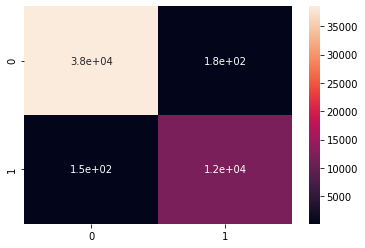

In [ ]:
y_pred_train = ANN_classifier.predict(X)
y_pred_train

y_pred_train = (y_pred_train > 0.5)

cm = confusion_matrix(y, y_pred_train)
sns.heatmap(cm, annot=True)

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

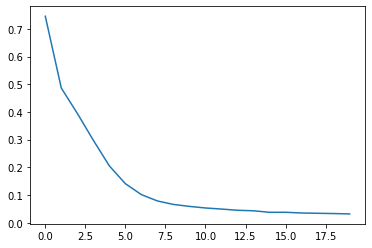

In [ ]:
plt.plot(epochs_hist.history['loss'])

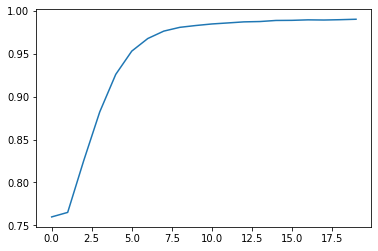

In [ ]:
plt.plot(epochs_hist.history['accuracy'])

In [ ]:
print(classification_report(y_pred_train, y))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     38643
        True       0.99      0.99      0.99     12239

    accuracy                           0.99     50882
   macro avg       0.99      0.99      0.99     50882
weighted avg       0.99      0.99      0.99     50882



# Result on Test data

In [ ]:
y_pred_test = ANN_classifier.predict(test)
y_pred_test = (y_pred_test > 0.5)
y_pred_test = y_pred_test.astype(int)

In [ ]:
numbers = list(range(50883,72688))
index = np.array(numbers)
index = index.reshape(-1,1)

In [ ]:
result = np.concatenate((index,y_pred_test), axis=1)

In [ ]:
final_result = pd.DataFrame(result, columns = ['ID','Response'])

In [ ]:
final_result.to_csv("/content/drive/My Drive/Colab Notebooks/ANN_model_13.csv", index=False)